In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random

import time

Creazione del grafo con l'algoritmo di Barabasi-Albert

In [2]:
N = 50
P = 0.25
G = nx.erdos_renyi_graph(N, P)

while min([d for n, d in G.degree()]) == 0:
    G = nx.erdos_renyi_graph(N, P)

Rappresentazione del grafico

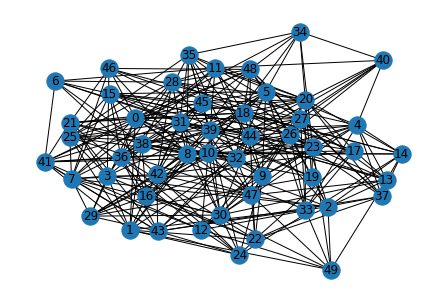

In [3]:
nx.draw(G, with_labels=True)
plt.show()

Distribuzione della connettività dei nodi

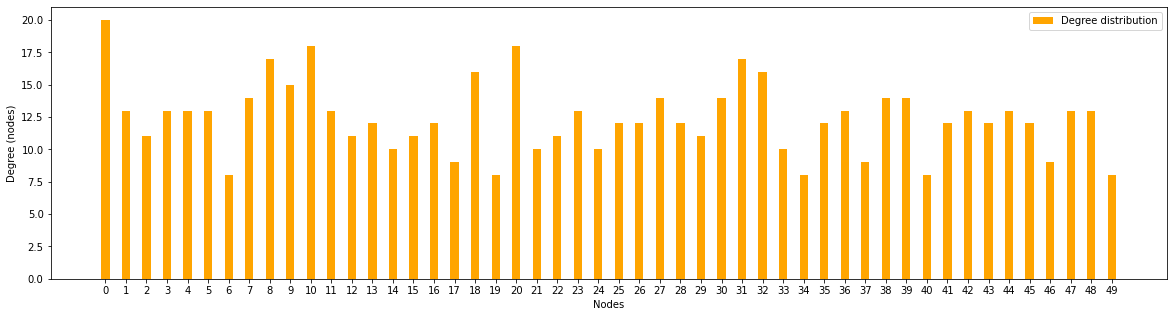

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(0.4*N, 5))

ax.bar(G.nodes, [d for n,d in G.degree], width=0.4, 
          align='center', color='orange', label='Degree distribution')

ax.legend()
ax.set_xlabel("Nodes")
ax.set_ylabel("Degree (nodes)")
ax.set_xticks(np.arange(0, N, 1))
# ax[i].grid(True)

plt.show()

Estrazione della matrice di adiacenza A

In [5]:
adjacency = list(G.adjacency())
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)] 
    for c in b : 
        A[a][c] = 1

Estrazione della matrice di stocastica P e calcolo dei suoi autovalori e autovettori

In [6]:
P = []
for a, b in adjacency :
    P += [[0]*len(adjacency)]
    for c in b: 
        P[a][c] = 1./G.degree[a]

In [7]:
matrixP = np.array(P)
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)
pS = autovettoriP[0]
if pS[0] < 0:
    pS = -pS
#np.dot(np.transpose(matrix),autovettori[0])

In [8]:
autovaloriP

array([ 1.        , -0.45462103, -0.44428612, -0.43003586,  0.41657484,
        0.40131843,  0.39941704,  0.3655114 , -0.39587717, -0.37809089,
       -0.34351579, -0.3316915 , -0.31820613,  0.30493476,  0.2968867 ,
        0.28596981,  0.27523893, -0.28948272,  0.25312705,  0.23458599,
       -0.27598105, -0.25912118,  0.21027654,  0.19986231, -0.23510921,
       -0.21430554,  0.17451009,  0.15850752,  0.14727059,  0.13308585,
       -0.18165115, -0.17954711, -0.16983502,  0.10731242,  0.09658304,
        0.0812226 ,  0.06250703, -0.14933117,  0.03919775,  0.01043732,
        0.00466223, -0.01082318, -0.01448747, -0.03354374, -0.05286324,
       -0.07377425, -0.12232596, -0.08931946, -0.10389417, -0.1072801 ])

Definizione della matrice laplaciana L e calcolo dei suoi autovettori e autovalori

In [9]:
matrixL = np.identity(N) - matrixP

In [10]:
autovaloriL, autovettoriL = np.linalg.eig(np.transpose(matrixL))
autovettoriL = np.transpose(autovettoriL)
pS_L = autovettoriL[0]
if pS_L[0] < 0:
    pS_L = -pS_L

In [11]:
autovaloriL

array([2.72441756e-18, 5.83425156e-01, 5.98681571e-01, 6.00582965e-01,
       6.34488603e-01, 1.45462103e+00, 1.44428612e+00, 1.43003586e+00,
       1.39587717e+00, 1.37809089e+00, 6.95065242e-01, 7.03113302e-01,
       7.14030187e-01, 7.24761073e-01, 1.34351579e+00, 1.33169150e+00,
       1.31820613e+00, 7.46872951e-01, 7.65414009e-01, 1.28948272e+00,
       1.27598105e+00, 1.25912118e+00, 7.89723458e-01, 8.00137689e-01,
       1.23510921e+00, 8.25489914e-01, 8.41492479e-01, 8.52729411e-01,
       8.66914150e-01, 1.21430554e+00, 8.92687577e-01, 9.03416961e-01,
       9.18777401e-01, 9.37492969e-01, 1.18165115e+00, 1.17954711e+00,
       1.16983502e+00, 9.60802253e-01, 1.14933117e+00, 9.89562684e-01,
       9.95337768e-01, 1.01082318e+00, 1.01448747e+00, 1.03354374e+00,
       1.05286324e+00, 1.07377425e+00, 1.12232596e+00, 1.08931946e+00,
       1.10389417e+00, 1.10728010e+00])

La distribuzione stazionaria e il valore di Fiedler estratto dalle due matrici L e P coincidono fino alla 13-esima cifra decimale

In [12]:
i = 13
np.round(pS, i) == np.round(pS_L, i)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [13]:
round(1-max(autovaloriP[1:]), i) == round(min(autovaloriL[1:]), i)

True

Definizione del valore valore di Fiedler e della distribuzione stazionaria approssimate

In [14]:
FiedlerValue = round(min(autovaloriL[1:]), i)
FiedlerValue

0.5834251559397

In [15]:
pS = np.round(pS, i)

Assegnazione degli individui ai nodi per l'evoluzione della dinamica. L'assegnazione degli individui è fatta secondo una distribuzione uniforme.

In [16]:
walker_per_node = 10

In [17]:
seed = np.random.RandomState()
def dynamic_evolution(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            new_node = _random_subset(neighbours, 1, seed).pop()
            evolution[new_node] += 1
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[n]
    history += [evolution]

In [18]:
history = [[], [], []]
for h in range(len(history)):
    history[h] = [[walker_per_node] * len(G.nodes)]

time_steps = int(1e4)

In [19]:
t0 = time.time()

for h in range(len(history)):
    for n in G.nodes:
        G.nodes[n]['N_i'] = walker_per_node
    
    for t in range(time_steps):
        dynamic_evolution(G, history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 3 minutes and 25.819788932800293 seconds


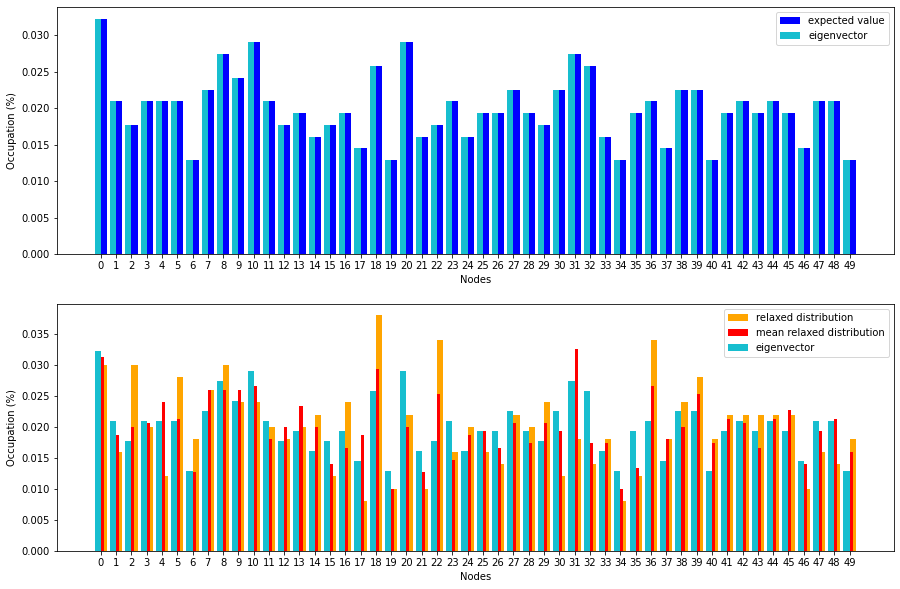

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(0.3*N, 10))

pSNorm = [d for n, d in G.degree()]
pSNorm = [h/sum(pSNorm) for h in pSNorm]

ax[0].bar(G.nodes, [h/sum(pSNorm) for h in pSNorm], width=0.4, align='edge', color='blue', label="expected value")
ax[0].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label="eigenvector")

ax[1].bar(G.nodes, [h/sum(history[0][-1]) for h in history[0][-1]], width=0.4, 
          align='edge', color='orange', label='relaxed distribution')
ax[1].bar(G.nodes, [(h1+h2+h3)/(sum(history[0][-1]) + sum(history[1][-1]) + sum(history[2][-1]))
                    for h1, h2, h3 in zip(history[0][-1], history[1][-1], history[2][-1])],
          width=0.2, align='edge', color='red', label='mean relaxed distribution')
ax[1].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label="eigenvector")

for i in [0,1]:
    ax[i].legend()
    ax[i].set_xlabel("Nodes")
    ax[i].set_ylabel("Occupation (%)")
    ax[i].set_xticks(np.arange(0, N, 1))
#     ax[i].grid(True)

plt.show()

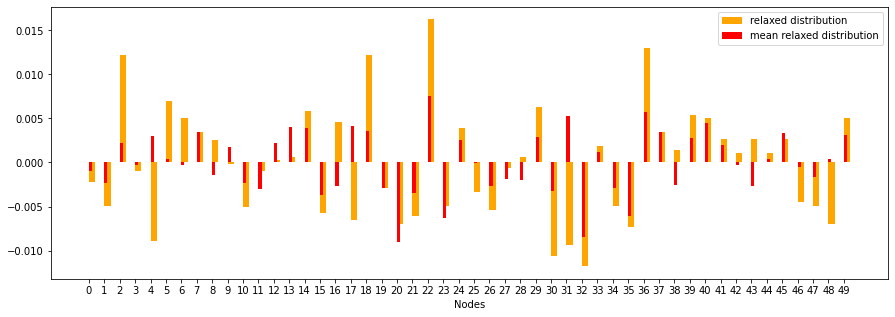

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(0.3*N, 5))

ax.bar(G.nodes, [h/sum(history[0][-1]) - k for h, k in zip(history[0][-1], pSNorm)], width=0.4, 
          align='edge', color='orange', label='relaxed distribution')
ax.bar(G.nodes, [(h1+h2+h3)/(sum(history[0][-1]) + sum(history[1][-1]) + sum(history[2][-1])) - k
                    for h1, h2, h3, k in zip(history[0][-1], history[1][-1], history[2][-1], pSNorm)],
          width=0.2, align='edge', color='red', label='mean relaxed distribution')

ax.legend()
ax.set_xlabel("Nodes")
# ax.set_ylabel("Occupation (%)")
ax.set_xticks(np.arange(0, N, 1))
# ax[i].grid(True)

plt.show()

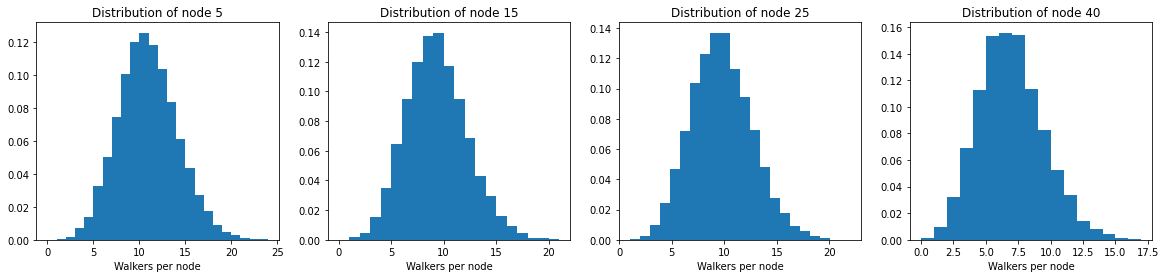

In [22]:
nodes = [5, 15, 25, 40]
p_node = []

fig, ax = plt.subplots(nrows = 1, ncols = len(nodes), figsize=(5*len(nodes), 4))

for i in range(len(nodes)):
    p_node += [[h[nodes[i]] for h in history[0]]]
    ax[i].hist(p_node[i], bins = max(p_node[i]), density = True)
    ax[i].set_title(f"Distribution of node {nodes[i]}")
    ax[i].set_xlabel("Walkers per node")

plt.show()

In [23]:
for i in range(len(nodes)):
    print("DIstribution for node", nodes[i], ":")
    print(sum(p_node[i])/time_steps)
    print(pSNorm[nodes[i]]*N*walker_per_node)
    print()

DIstribution for node 5 :
10.45
10.483870967741938

DIstribution for node 15 :
8.8362
8.870967741935484

DIstribution for node 25 :
9.674
9.67741935483871

DIstribution for node 40 :
6.4312
6.451612903225806



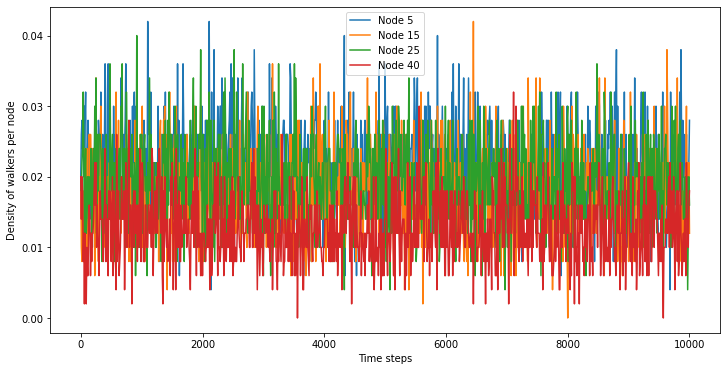

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12,1.5*len(nodes)))

time_range = history[0]
index = np.arange(0, len(time_range), 10)

for i in nodes: #list(G.nodes)[0:3]:
    plt.plot(index, [time_range[ind][i]/(walker_per_node*N) for ind in index], label = f"Node {i}")
#     plt.plot(index, [time_range[ind][i] for ind in index])
    
ax.set_xlabel("Time steps")
ax.set_ylabel("Density of walkers per node")
ax.legend()

plt.show()

# Note:

* aggiungere fit su distribuzioni di walkers

* sistema grafica concentrazioni di individui su ogni nodo

* fare grafico per fittare valore di Fiedler